In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### **ML From here:**

In [4]:
df = pd.read_csv('./data/MinMax_Scaled_Heart.csv')
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898  1.0       0.333333       0.70     0.479270        0.0   
1    0.428571  0.0       0.666667       0.80     0.298507        0.0   
2    0.183673  1.0       0.333333       0.65     0.469320        0.0   
3    0.408163  0.0       0.000000       0.69     0.354892        0.0   
4    0.530612  1.0       0.666667       0.75     0.323383        0.0   
..        ...  ...            ...        ...          ...        ...   
913  0.346939  1.0       1.000000       0.55     0.437811        0.0   
914  0.816327  1.0       0.000000       0.72     0.320066        1.0   
915  0.591837  1.0       0.000000       0.65     0.217247        0.0   
916  0.591837  0.0       0.333333       0.65     0.391376        0.0   
917  0.204082  1.0       0.666667       0.69     0.290216        0.0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           0.5  0.788732             0.0  0.295455       1.0             0  
1           0.5  0.676056             0.0  0.409091       0.5             1  
2           1.0  0.267606             0.0  0.295455       1.0             0  
3           0.5  0.338028             1.0  0.465909       0.5             1  
4           0.5  0.436620             0.0  0.295455       1.0             0  
..          ...       ...             ...       ...       ...           ...  
913         0.5  0.507042             0.0  0.431818       0.5             1  
914         0.5  0.570423             0.0  0.681818       0.5             1  
915         0.5  0.387324             1.0  0.431818       0.5             1  
916         0.0  0.802817             0.0  0.295455       0.5             1  
917         0.5  0.795775             0.0  0.295455       1.0             0  

[918 rows x 12 columns]

In [5]:
pd.DataFrame(df).describe().transpose()

count      mean       std  min       25%       50%       75%  \
Age             918.0  0.520630  0.192502  0.0  0.387755  0.530612  0.653061   
Sex             918.0  0.789760  0.407701  0.0  1.000000  1.000000  1.000000   
ChestPainType   918.0  0.260349  0.318840  0.0  0.000000  0.000000  0.666667   
RestingBP       918.0  0.661983  0.092571  0.0  0.600000  0.650000  0.700000   
Cholesterol     918.0  0.329684  0.181400  0.0  0.287313  0.369818  0.442786   
FastingBS       918.0  0.233115  0.423046  0.0  0.000000  0.000000  0.000000   
RestingECG      918.0  0.494553  0.315836  0.0  0.500000  0.500000  0.500000   
MaxHR           918.0  0.540911  0.179298  0.0  0.422535  0.549296  0.676056   
ExerciseAngina  918.0  0.404139  0.490992  0.0  0.000000  0.000000  1.000000   
Oldpeak         918.0  0.396291  0.121201  0.0  0.295455  0.363636  0.465909   
ST_Slope        918.0  0.680828  0.303528  0.0  0.500000  0.500000  1.000000   
HeartDisease    918.0  0.553377  0.497414  0.0  0.000000  1.000000  1.000000   

                max  
Age             1.0  
Sex             1.0  
ChestPainType   1.0  
RestingBP       1.0  
Cholesterol     1.0  
FastingBS       1.0  
RestingECG      1.0  
MaxHR           1.0  
ExerciseAngina  1.0  
Oldpeak         1.0  
ST_Slope        1.0  
HeartDisease    1.0

In [6]:
y=df.iloc[:,-1].values
df.drop(df.columns[-1], axis=1, inplace=True)
X = df.iloc[:,:].values
X_with_column = df.iloc[:,:]
X.shape

(918, 11)

Spliting the training set and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=101)
X_train.shape

(734, 11)

# Checking all the classifiers with default settings

In [8]:
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    SGDClassifier,
    RidgeClassifier,
    PassiveAggressiveClassifier,
)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    ComplementNB,
    GaussianNB,
    MultinomialNB,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


def create_and_fit_classifiers(X_train, y_train):
    classifiers = {
        "Logistic Regression Classifier": LogisticRegression(),
        # "Linear Regression Classifier": LinearRegression(),
        # "Stochastic Gradient Descent": SGDClassifier(),
        # "Ridge Classifier": RidgeClassifier(),
        # "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "K-Nearest Neighbor Classifier": KNeighborsClassifier(),
        # "Radius Neighbor Classifier": RadiusNeighborsClassifier(),
        # "Nearest Centroid Classifier": NearestCentroid(),
        "Random Forest Classifier": RandomForestClassifier(),
        "AdaBoost Classifier": AdaBoostClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier(),
        "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        "Extra Trees Classifier": ExtraTreesClassifier(),
        "Gaussian Naive Bayes Classifier": GaussianNB(),
        "Bernoulli Naive Bayes Classifier": BernoulliNB(),
        # "Categorical Naive Bayes Classifier": CategoricalNB(),
        # "Complement Naive Bayes Classifier": ComplementNB(),
        # "Multinomial Naive Bayes Classifier": MultinomialNB(),
        # "Support Vector Classifier": SVC(),
        # "Linear Support Vector Classifier": LinearSVC(),
        "Multi-layer Perceptron classifier": MLPClassifier(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Gaussian Process Classifier": GaussianProcessClassifier(),
        # "Kernel Ridge Classifier": KernelRidge(),
        "Dummy Classifier": DummyClassifier(),
        "LightGBM Classifier": LGBMClassifier(force_col_wise=True),
        "Extreme Gradient Boosting Classifier": XGBClassifier(),
        "Cat Boost Classifier": CatBoostClassifier(),
    }

    fitted_classifiers = {}

    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        fitted_classifiers[name] = classifier

    return fitted_classifiers


models = create_and_fit_classifiers(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

# The metrics

In [7]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import (
#     accuracy_score,
#     recall_score,
#     precision_score,
#     f1_score,
#     confusion_matrix,
#     roc_auc_score,
#     cohen_kappa_score,
#     log_loss,
#     average_precision_score,
#     jaccard_score,
#     matthews_corrcoef,
#     balanced_accuracy_score,
# )


# def calculate_metrics(y_true, y_pred, y_pred_proba):
#     cm = confusion_matrix(y_true, y_pred)

#     metrics = {
#         "Accuracy": accuracy_score(y_true, y_pred),
#         "Precision": precision_score(y_true, y_pred),
#         "Recall": recall_score(y_true, y_pred),
#         "F1 Score": f1_score(y_true, y_pred),
#         "AUC": roc_auc_score(y_true, y_pred_proba),
#         "MCC": matthews_corrcoef(y_true, y_pred),
#         "Kappa": cohen_kappa_score(y_true, y_pred),
#         "TP": cm[1][1],
#         "TN": cm[0][0],
#         "FP": cm[1][0],
#         "FN (Type-2)": cm[0][1],
#     }
#     return metrics


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
    log_loss,
    average_precision_score,
    jaccard_score,
    balanced_accuracy_score,
)


def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


def geometric_mean_score(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return np.sqrt(sensitivity * specificity)


def index_balanced_accuracy(y_true, y_pred, alpha=0.1):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (1 + alpha * (sensitivity + specificity)) * (sensitivity * specificity)


def calculate_metrics(y_true, y_pred, y_pred_proba):
    cm = confusion_matrix(y_true, y_pred)

    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_pred_proba),
        "Kappa": cohen_kappa_score(y_true, y_pred),
        "Log Loss": log_loss(y_true, y_pred_proba),
        "Average Precision": average_precision_score(y_true, y_pred_proba),
        "Jaccard": jaccard_score(y_true, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
        "Specificity": specificity_score(y_true, y_pred),
        "Geometric Mean": geometric_mean_score(y_true, y_pred),
        "IBA": index_balanced_accuracy(y_true, y_pred),
        "TP": cm[1][1],
        "TN": cm[0][0],
        "FP": cm[1][0],
        "FN (Type-2)": cm[0][1],
    }
    return metrics



def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Assuming binary classification

    stratified_cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, X, y, cv=stratified_cv)

    metrics = calculate_metrics(y, y_pred, y_pred_proba)
    metrics["CV Mean Score (10)"] = scores.mean() * 100
    metrics["CV Std Score (10)"] = scores.std() * 100

    return metrics


def evaluate_models(models, X, y, dataset_name="Dataset"):
    results = []

    for model_name, model in models.items():
        metrics = evaluate_model(model, X, y)
        # Reorder to place Model and Dataset first
        ordered_metrics = {"Model": model_name, "Dataset": dataset_name, **metrics}
        results.append(ordered_metrics)

    return pd.DataFrame(results)

In [9]:
test_results_df = evaluate_models(models, X_test, y_test, dataset_name="Test Set")
sorted_df = test_results_df.sort_values(by=['Accuracy', 'FN (Type-2)'], ascending=[False, False]).reset_index(drop=True)
sorted_df

/media/masud1901/CLASS & STUDY/Abrar Project/Heart Disease/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/masud1901/CLASS & STUDY/Abrar Project/Heart Disease/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/masud1901/CLASS & STUDY/Abrar Project/Heart Disease/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/masud1901/CLASS & STUDY/Abrar Project/Heart Disease/venv/lib/python3.10/site-packages/sklearn/ensemble

[LightGBM] [Info] Number of positive: 138, number of negative: 110
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556452 -> initscore=0.226773
[LightGBM] [Info] Start training from score 0.226773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Model   Dataset  Accuracy  Precision  \
0                   Cat Boost Classifier  Test Set  0.913043   0.916129   
1                 Extra Trees Classifier  Test Set  0.909420   0.921053   
2               Random Forest Classifier  Test Set  0.898551   0.898089   
3           Gradient Boosting Classifier  Test Set  0.898551   0.898089   
4                    LightGBM Classifier  Test Set  0.894928   0.902597   
5      Hist Gradient Boosting Classifier  Test Set  0.891304   0.896774   
6   Extreme Gradient Boosting Classifier  Test Set  0.891304   0.896774   
7        Gaussian Naive Bayes Classifier  Test Set  0.884058   0.911565   
8      Multi-layer Perceptron classifier  Test Set  0.876812   0.888889   
9            Gaussian Process Classifier  Test Set  0.876812   0.894040   
10         K-Nearest Neighbor Classifier  Test Set  0.862319   0.880795   
11        Logistic Regression Classifier  Test Set  0.858696   0.885135   
12       Quadratic Discriminant Analysis  Test Set  0.855072   0.864516   
13          Linear Discriminant Analysis  Test Set  0.851449   0.883562   
14                   AdaBoost Classifier  Test Set  0.847826   0.862745   
15                    Bagging Classifier  Test Set  0.829710   0.863014   
16              Decision Tree Classifier  Test Set  0.800725   0.814103   
17      Bernoulli Naive Bayes Classifier  Test Set  0.800725   0.835616   
18                      Dummy Classifier  Test Set  0.554348   0.554348   

      Recall  F1 Score       AUC       MCC     Kappa   TP   TN  FP  \
0   0.928105  0.922078  0.954248  0.823816  0.823727  142  110  11   
1   0.915033  0.918033  0.946065  0.816843  0.816821  140  111  13   
2   0.921569  0.909677  0.946411  0.794363  0.794019  141  107  12   
3   0.921569  0.909677  0.942717  0.794363  0.794019  141  107  12   
4   0.908497  0.905537  0.941867  0.787194  0.787173  139  108  14   
5   0.908497  0.902597  0.945002  0.779742  0.779658  139  107  14   
6   0.908497  0.902597  0.934747  0.779742  0.779658  139  107  14   
7   0.875817  0.893333  0.934215  0.767196  0.766460  134  110  19   
8   0.888889  0.888889  0.938892  0.750678  0.750678  136  106  17   
9   0.882353  0.888158  0.937032  0.751155  0.751074  135  107  18   
10  0.869281  0.875000  0.913332  0.721866  0.721789  133  105  20   
11  0.856209  0.870432  0.930868  0.715625  0.715148  131  106  22   
12  0.875817  0.870130  0.928370  0.706287  0.706211  134  102  19   
13  0.843137  0.862876  0.931027  0.701930  0.701015  129  106  24   
14  0.862745  0.862745  0.915617  0.692013  0.692013  132  102  21   
15  0.823529  0.842809  0.906903  0.658119  0.657261  126  103  27   
16  0.830065  0.822006  0.797147  0.595862  0.595717  127   94  26   
17  0.797386  0.816054  0.894787  0.599704  0.598922  122   99  31   
18  1.000000  0.713287  0.500000  0.000000  0.000000  153    0   0   

    FN (Type-2)  CV Mean Score (10)  CV Std Score (10)  
0            13           88.134921           8.859284  
1            12           87.764550           7.991049  
2            16           87.764550           7.652605  
3            16           88.809524           8.030353  
4            15           88.478836           6.889859  
5            16           88.452381           6.307471  
6            16           88.108466           7.124572  
7            13           87.037037           8.113977  
8            17           85.595238           8.979027  
9            16           86.679894           7.254191  
10           18           84.523810           9.262282  
11           17           85.582011           8.111820  
12           21           85.965608           8.151079  
13           17           84.140212           8.729247  
14           21           83.425926           8.255081  
15           20           84.880952           9.221968  
16           29           83.015873           9.210225  
17           24           81.256614           7.180006  
18          123           55.436508           1.38

In [10]:
# sorted_df.to_csv('BenchmarkResults.csv')

# Working with the best classifier out of these

In [11]:
best_model = models[sorted_df['Model'][0]]

In [12]:
import plotly.figure_factory as ff
import pandas as pd
from sklearn.metrics import classification_report

def plot_classification_report(model, X, y):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Ensure the data is in the correct format for the heatmap
    z = report_df.iloc[:-1, :-1].values
    x = report_df.columns[:-1].tolist()
    y = report_df.index[:-1].tolist()

    fig = ff.create_annotated_heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='Blues',
        annotation_text=z.round(2),
        hoverinfo="z"
    )

    # Update layout
    fig.update_layout(
        title='Classification Report',
        xaxis_title='Metrics',
        yaxis_title='Classes',
        width=800,
        height=600,
        template='plotly_white',
    )

    # Show the plot
    fig.show()

# Example usage:
plot_classification_report(best_model, X, y)


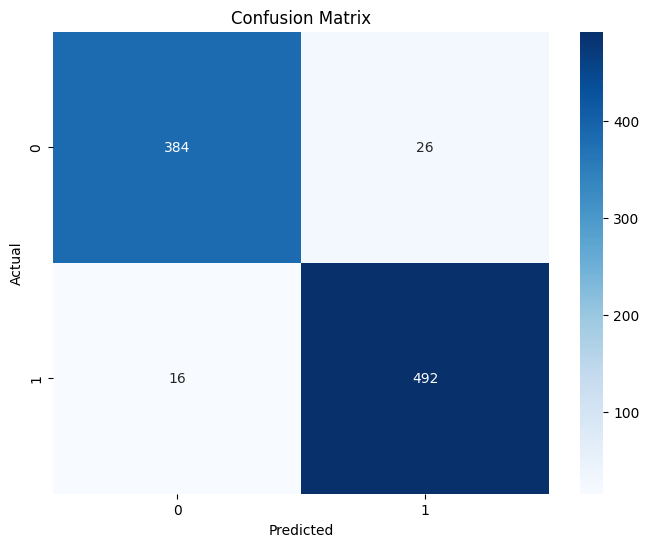

In [13]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y),
        yticklabels=np.unique(y),
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


plot_confusion_matrix(best_model, X, y)

In [14]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create ROC curve trace
    roc_trace = go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        line=dict(color="darkorange", width=2),
        name=f"ROC curve (AUC = {roc_auc:.2f})",
    )

    # Create diagonal line trace
    diagonal_trace = go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        line=dict(color="navy", width=2, dash="dash"),
        showlegend=False,
    )

    # Create layout
    layout = go.Layout(
        title="Receiver Operating Characteristic (ROC) Curve",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        width=800,
        height=600,
        legend=dict(x=0.8, y=0.1, traceorder="normal"),
        margin=dict(l=50, r=50, t=80, b=50),
        template="plotly_white",
    )

    # Create figure
    fig = go.Figure(data=[roc_trace, diagonal_trace], layout=layout)

    # Show the plot
    fig.show()


# Example usage:
plot_roc_curve(best_model, X, y)

In [15]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    average_precision = average_precision_score(y, y_pred_proba)

    # Create figure
    fig = go.Figure()

    # Plot precision-recall curve
    fig.add_trace(go.Scatter(
        x=recall, 
        y=precision, 
        mode='lines',
        name=f'AP = {average_precision:.2f}',
        line=dict(color='blue', width=2),
        hovertemplate='Recall: %{x:.2f}<br>Precision: %{y:.2f}<extra></extra>'
    ))

    # Update layout
    fig.update_layout(
        title='Precision-Recall Curve',
        xaxis_title='Recall',
        yaxis_title='Precision',
        width=800,
        height=600,
        template='plotly_white',
        legend=dict(x=0.7, y=0.1, traceorder='normal')
    )

    # Show the plot
    fig.show()

# Example usage:
plot_precision_recall_curve(best_model, X, y)


In [16]:
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create figure
    fig = go.Figure()

    # Plot training scores
    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=train_scores_mean,
            mode="lines+markers",
            name="Training score",
            line=dict(color="red", width=2),
            error_y=dict(
                type="data",
                array=train_scores_std,
                visible=True,
                color="rgba(255, 0, 0, 0.3)",
            ),
        )
    )

    # Plot cross-validation scores
    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=test_scores_mean,
            mode="lines+markers",
            name="Cross-validation score",
            line=dict(color="green", width=2),
            error_y=dict(
                type="data",
                array=test_scores_std,
                visible=True,
                color="rgba(0, 128, 0, 0.3)",
            ),
        )
    )

    # Update layout
    fig.update_layout(
        title="Learning Curve",
        xaxis_title="Training Examples",
        yaxis_title="Score",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(x=0.7, y=0.1, traceorder="normal"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_learning_curve(best_model, X, y)

Learning rate set to 0.005871
Learning rate set to 0.003541
Learning rate set to 0.007354
Learning rate set to 0.003541
0:	learn: 0.6847286	total: 48.6ms	remaining: 48.5s
1:	learn: 0.6763949	total: 50.9ms	remaining: 25.4s
0:	learn: 0.6900651	total: 51.1ms	remaining: 51s
1:	learn: 0.6862152	total: 52ms	remaining: 25.9s
2:	learn: 0.6679703	total: 52.3ms	remaining: 17.4s
2:	learn: 0.6825373	total: 53ms	remaining: 17.6s
3:	learn: 0.6782306	total: 55.5ms	remaining: 13.8s
4:	learn: 0.6749941	total: 56.5ms	remaining: 11.2s
5:	learn: 0.6714300	total: 57.4ms	remaining: 9.52s
6:	learn: 0.6680072	total: 58.4ms	remaining: 8.29s
0:	learn: 0.6826487	total: 48.6ms	remaining: 48.6s
7:	learn: 0.6637215	total: 61.3ms	remaining: 7.6s
1:	learn: 0.6743235	total: 50.6ms	remaining: 25.3s
Learning rate set to 0.005871
3:	learn: 0.6592020	total: 70.4ms	remaining: 17.5s
2:	learn: 0.6671635	total: 63ms	remaining: 20.9s
8:	learn: 0.6603978	total: 77.8ms	remaining: 8.56s
4:	learn: 0.6516188	total: 74.2ms	remaining

In [17]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

def plot_feature_importance(model, X):
    feature_importances = model.feature_importances_
    features = X.columns

    feature_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
    feature_df = feature_df.sort_values(by="Importance", ascending=False)

    # Create horizontal bar chart
    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=feature_df["Importance"],
            y=feature_df["Feature"],
            orientation='h',
            marker=dict(color=feature_df["Importance"], colorscale='Blues', cmin=0, cmax=max(feature_importances)),
            hovertemplate='Importance: %{x:.2f}',
        )
    )

    # Update layout
    fig.update_layout(
        title="Feature Importance",
        xaxis_title="Importance",
        yaxis_title="Feature",
        width=800,
        height=600,
        template='plotly_white',
    )

    # Show the plot
    fig.show()

# Example usage:
plot_feature_importance(best_model, X_with_column)


In [18]:
import plotly.graph_objects as go
from sklearn.calibration import calibration_curve


def plot_calibration_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    prob_true, prob_pred = calibration_curve(y, y_pred_proba, n_bins=10)

    # Create figure
    fig = go.Figure()

    # Plot calibration curve
    fig.add_trace(
        go.Scatter(
            x=prob_pred,
            y=prob_true,
            mode="markers+lines",
            name="Calibration Curve",
            line=dict(color="blue", width=2),
            marker=dict(size=8),
            hovertemplate="Predicted: %{x:.2f}<br>Actual: %{y:.2f}<extra></extra>",
        )
    )

    # Plot ideal line
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode="lines",
            name="Ideal",
            line=dict(color="black", width=2, dash="dash"),
            hoverinfo="skip",
        )
    )

    # Update layout
    fig.update_layout(
        title="Calibration Curve",
        xaxis_title="Mean Predicted Probability",
        yaxis_title="Fraction of Positives",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(x=0.7, y=0.1, traceorder="normal"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_calibration_curve(best_model, X, y)

In [19]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create the figure
    fig = go.Figure()

    # Add the ROC curve
    fig.add_trace(
        go.Scatter(
            x=fpr,
            y=tpr,
            mode="lines",
            name=f"ROC curve (AUC = {roc_auc:.2f})",
            line=dict(color="darkorange", width=2),
        )
    )

    # Add the diagonal line
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode="lines",
            name="Chance",
            line=dict(color="navy", dash="dash"),
        )
    )

    # Add an annotation for the 50% point
    fig.add_trace(
        go.Scatter(
            x=[0.5],
            y=[0.5],
            mode="markers+text",
            name="50% Point",
            text=["50% Point"],
            textposition="top center",
            marker=dict(color="red", size=10, symbol="x"),
        )
    )

    # Update layout
    fig.update_layout(
        title="Receiver Operating Characteristic (ROC) Curve",
        title_font_size=16,
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(
            x=0.7,
            y=0.1,
            bgcolor="rgba(255, 255, 255, 0.5)",
            bordercolor="black",
            borderwidth=1,
        ),
    )

    # Add AUC annotation
    fig.add_annotation(
        x=0.6,
        y=0.2,
        text=f"AUC = {roc_auc:.2f}",
        showarrow=False,
        font=dict(size=14, color="darkorange"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_roc_curve(best_model, X_test, y_test)

NameError: name 'train_labels_real' is not defined

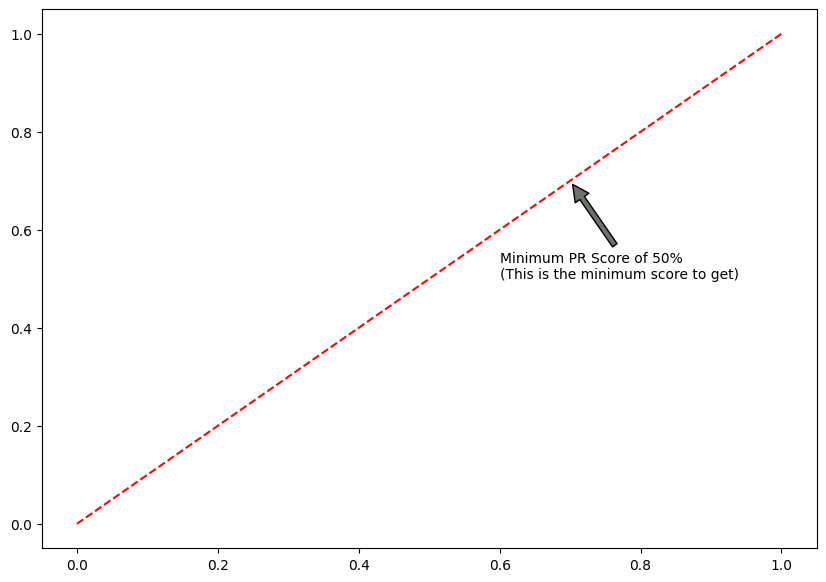

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], "r--")
plt.annotate(
    "Minimum PR Score of 50%\n(This is the minimum score to get)",
    xy=(0.7, 0.7),
    xytext=(0.6, 0.5),
    arrowprops=dict(facecolor="#6E726D", shrink=0.05),
)

precision2, recall2, _ = sklearn.metrics.roc_curve(train_labels_real, train_labels_pred)
score2 = sklearn.metrics.average_precision_score(train_labels_real, train_labels_pred)
plt.plot(
    precision2,
    recall2,
    label="QAmplifyNet Train Baseline, PR Score: {0:.4f}".format(score2),
)

precision, recall, _ = sklearn.metrics.roc_curve(
    rounded_labels_real, rounded_labels_pred
)
score = sklearn.metrics.average_precision_score(
    rounded_labels_real, rounded_labels_pred
)
plt.plot(
    precision,
    recall,
    label="QAmplifyNet Test Baseline, PR Score: {0:.4f}".format(score),
)

plt.legend()


plt.title(
    "Precision-Recall (PR) Curves For QAmplifyNet\n", fontsize=16
)  # Add title to main plot
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.axis([-0.01, 1, 0, 1])
# Save the figure to a file
plt.savefig("PR_curve.png")
plt.show()